# Symbolic Feature Extraction Implementation
Author: Taylor Qin<br>
Version: v2-13Apr

## Step 1 -- Auto Encoder
### Algorithm 6 Fitted Q-Iteration with Deep State Features
(ref: https://danielegrattarola.github.io/files/publications/2017_10_grattarola_master_thesis.pdf Chapter 4 P63)

Using TensorFlow backend.
/home/lenovo/Documents/ANU_courses/COMP4450/Generative-adversarial-transfer-learning-for-symbolic-representation-in-DRL/env_openai/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lenovo/Documents/ANU_courses/COMP4450/Generative-adversarial-transfer-learning-for-symbolic-representation-in-DRL/env_openai/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lenovo/Documents/ANU_courses/COMP4450/Generative-adversarial-transfer-learning-for-symbolic-representation-in-DRL/env_openai/lib/python3.7/si

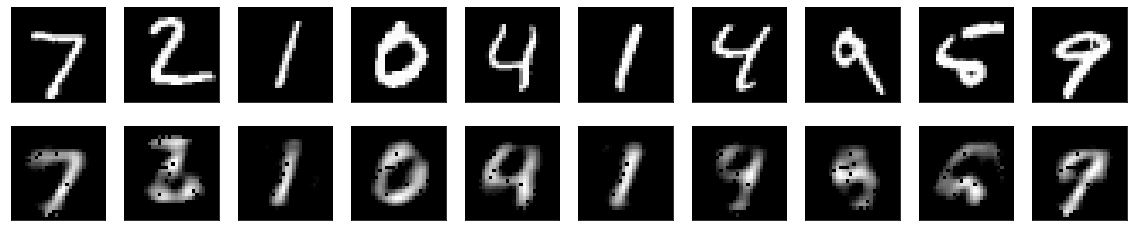

In [1]:
"""
Autoencoder with single hidden layer
"""
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

np.random.seed(1)
outer_layer_num = 784
inner_layer_num = 10
epoch_size = 20
# minibatch
batch_size = 32

def train(x_train):
    input_image = Input(shape=(outer_layer_num, ))

    # encoding layer
    hidden_layer = Dense(inner_layer_num, activation='relu')(input_image)
    
    # decoding layer
    decode_output = Dense(outer_layer_num, activation='relu')(hidden_layer)

    autoencoder = Model(inputs=input_image, outputs=decode_output)
    encoder = Model(inputs=input_image, outputs=hidden_layer)
    autoencoder.compile(optimizer='adam', loss='mse') # MSE loss, can be further modified
    autoencoder.fit(x_train, x_train, epochs=epoch_size, batch_size=batch_size, shuffle=True)
    return encoder, autoencoder

def plot_helper(n, i, origin):
    plt.gray()
    if origin:
        ax = plt.subplot(2, n, i+1)
        ax.imshow(x_test[i].reshape(28, 28))
    else:
        ax = plt.subplot(2, n, i + 1 + n)
        ax.imshow(decode_images[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

def plot_images(decode_images, x_test):
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plot_helper(n, i, True) # print origin
        plot_helper(n, i, False) # print result
    plt.show()

if __name__ == '__main__':
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # Prepocess
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))

    # Train
    encoder, autoencoder = train(x_train=x_train)
    encode_images = encoder.predict(x_test)
    decode_images = autoencoder.predict(x_test)
    plot_images(decode_images, x_test)

In [ ]:
# Combining pooling

In [7]:
"""
Convolutional Autoencoder
"""
from keras.layers import Conv2D, MaxPool2D,Input, UpSampling2D
CHANNEL_1 = 16
CHANNEL_2 = 8
CHANNEL_OUTPUT = 1
def train_2(x_train):
    input_image = Input(shape=(28, 28, 1))

    # encoding layer
    x = Conv2D(CHANNEL_1, (3, 3), activation='relu', padding="same")(input_image)
    x = MaxPool2D((2, 2), padding='same')(x)
    x = Conv2D(CHANNEL_2, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPool2D((2, 2), padding='same')(x)

    # decoding layer
    x = Conv2D(CHANNEL_2, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(CHANNEL_1, (3, 3),activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(CHANNEL_OUTPUT, (3, 3), activation='sigmoid', padding='same')(x)

    # build autoencoder, encoder, decoder
    autoencoder = Model(inputs=input_image, outputs=decoded)
    encoder = Model(inputs=input_image, outputs=encoded)

    # compile autoencoder
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#     autoencoder.summary()

    # training
    # need return history, otherwise can not use history["acc"]
    history_record = autoencoder.fit(x_train, x_train, epochs=epoch_size, batch_size=batch_size, shuffle=True, )

    return encoder, autoencoder, history_record

if __name__ == '__main__':
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    # Step3: reshape data, x_train: (60000, 28, 28, 1), x_test: (10000, 28, 28, 1), one row denotes one sample.
    x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
    x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

    # Step4： train
    encoder, autoencoder, history_record = train_2(x_train=x_train)

    # show images
    decode_images = autoencoder.predict(x_test)
    plot_images(decode_images, x_test)

#     plot_accuray(history_record)


 306/1875 [===>..........................] - ETA: 42s - loss: 0.3077 - accuracy: 0.8045

KeyboardInterrupt: 